In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import classify
import mcc

In [84]:
from sigmoid import sigmoid
from softmax import softmax

print sigmoid(5)
print softmax(np.array([5, 1]))

0.993307149076
[ 0.98201379  0.01798621]


In [2]:
import htwt
import iris

In [3]:
mvn = stats.multivariate_normal.rvs
y = 1.0 * np.random.choice(2, size = 200)
X = np.array([mvn([1, 1] if heads else [4, 4]) for heads in y])

In [4]:
X, y = htwt.get()

In [5]:
X, y = iris.get()
X = X[:, [0, 1]]

In [10]:
import nb
import lda
import qda
import rda
import nsc
import irls
import logistic
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid

In [55]:
clf = BernoulliNB()
clf = nb.bernoulli()
clf = GaussianNB()
clf = nb.gaussian()
clf = rda.Classifier()
clf = NearestCentroid()
clf = nsc.Classifier()
clf = LDA()
clf = lda.Classifier()
clf = qda.Classifier()
clf = QDA()
clf = irls.Classifier()
reload(logistic)
clf = LogisticRegression()
clf = logistic.Classifier()

In [77]:
C = len(np.unique(y))
N, D = X.shape
Y = np.zeros((N, C))
for i in range(N):
    Y[i, y[i]] = 1
    
NLL = lambda W: -sum([Y[i].dot(ll) for i, ll in enumerate(np.log(mu(W)))])
mu = lambda W: softmax(X.dot(W))
mus = lambda W: enumerate(mu(W))
o = lambda x: np.outer(x, x)

f0 = NLL
g0 = lambda W: np.sum([np.kron(mu - Y[i], X[i]) for i, mu in mus(W)], axis = 0)
H0 = lambda W: np.sum([np.kron(np.diag(mu) - o(mu), o(X[i])) for i, mu in mus(W)])

V0_inv = np.eye(C)

f1 = lambda W: f0(W) + 0.5 * np.sum([w.dot(V0_inv).dot(w) for w in W])
g1 = lambda W: g0(W) # + V0_inv.dot(np.sum(W, axis = 0))
H1 = lambda W: H0(W) # + np.kron(np.eye(C), V0_inv)

fixup = lambda W: np.c_[W.reshape(D, C - 1), np.zeros(D)]

f2 = lambda W: f1(fixup(W))
g2 = lambda W: g1(fixup(W))
H2 = lambda W: H1(fixup(W))

#from scipy.optimize import minimize
#minimize(f2, W, method = 'Newton-CG', jac = g2, hess = H2)

print g2(W)

[41.866666666666546 -18.20000000000001 -4.63333333333332 14.199999999999969
 -37.23333333333331 3.9999999999999734]


In [57]:
clf.fit(X, y)
print '%0.3f' % np.mean(np.mean(clf.predict(X) != y))

ValueError: shapes (9,9) and (3,) not aligned: 9 (dim 1) != 3 (dim 0)

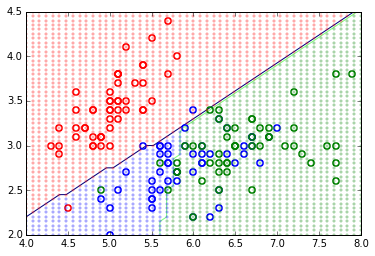

In [9]:
classify.show_points(X, y)
classify.show_regions(clf, X)
# classify.show_contour(clf, X)
plt.show()